<center>
    
    Inverse of Submatrices
    
    Author: Daniel Coble
    
    Status: Finished
</center>

I show an implementation of the method shown in [this](https://stats.stackexchange.com/questions/450146/updating-the-inverse-covariance-matrix-after-deleting-the-i-th-column-and-row-of) stackexchange post, which shows how to use a matix's inverse to calculate the inverse after row and column $i$ are removed. The function provided here is slightly more general, it:
1. allows different rows and columns to be removed
2. allows multiple columns and rows to be removed from the supermatrix.

The function grows at $O(n^2)$ compared to $O(n^3)$ for standard matrix inversion. Running a speed comparison test shows that the submatrix function is always faster but becomes noticably better at around $n=750$.

In [51]:
import numpy as np
'''
_A_inv: inverse of supermatrix
rem_rows: row or rows that are removed to create the submatrix
rem_cols: column or columns that are removed to create the submatrix.
_A_: supermatrix (not needed but if you pass it, the submatrix A is returned)
'''
def invert_submatrix(_A_inv, rem_rows, rem_cols, _A_=None):
    if(isinstance(rem_rows, int)):
        rem_rows = [rem_rows]
    if(isinstance(rem_cols, int)):
        rem_cols = [rem_cols]
    if(not type(rem_rows) is np.ndarray):
        rem_rows = np.array(rem_rows)
    if(not type(rem_cols) is np.ndarray):
        rem_cols = np.array(rem_cols)
    assert np.size(rem_rows) == np.size(rem_cols)
    k = np.size(rem_rows)
    
    A = None
    if(not _A_ is None):
        A = np.delete(_A_, rem_rows, axis=0)
        A = np.delete(A, rem_cols, axis=1)
    
    a = _A_inv
    a = np.delete(_A_inv, rem_cols, axis=0)
    a = np.delete(a, rem_rows, axis=1)
    
    b = np.column_stack([_A_inv[:,i] for i in rem_rows])
    c = np.row_stack([_A_inv[i,:] for i in rem_cols])
    d = np.row_stack([b[i,:] for i in rem_cols])
    b = np.delete(b, rem_cols, axis=0)
    c = np.delete(c, rem_rows, axis=1)
    
    Ainv = a - b@np.linalg.inv(d)@c
    if(not A is None):
        return (Ainv, A)
    return Ainv

In [52]:
# a simple unit test
_A_ = np.random.rand(5, 5)
_A_inv = np.linalg.inv(_A_)
rem_rows = [1, 4]
rem_cols = [1, 2]

Ainv, A = invert_submatrix(_A_inv, rem_rows, rem_cols, _A_)

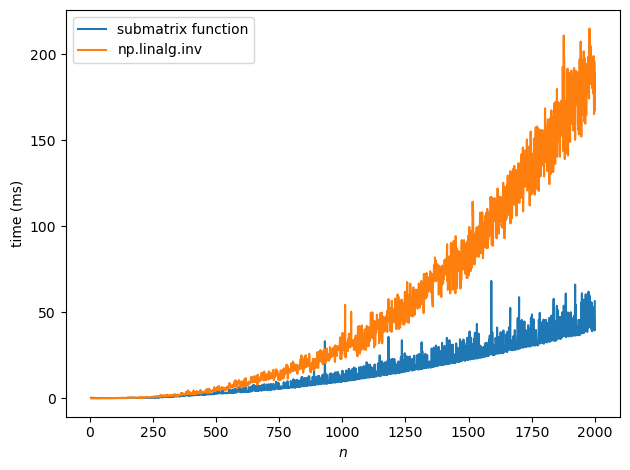

In [53]:
# plot the timing on random matrices n=5 to 2000 and compare against np.linalg.inv
import matplotlib.pyplot as plt
import time

submatrix_timing = np.zeros(1996)
comparison_timing = np.zeros(1996)

for i in range(5, 2001):
    _A_inv = np.random.rand(i, i) # a random matrix is the inverse of some matrix
    
    t1 = time.perf_counter()
    Ainv = invert_submatrix(_A_inv, [0], [0])
    t1 = (time.perf_counter() - t1)*1000
    
    t2 = time.perf_counter()
    Ainv = np.linalg.inv(_A_inv[1:,1:])
    t2 = (time.perf_counter() - t2)*1000
    
    submatrix_timing[i-5] = t1
    comparison_timing[i-5] = t2

plt.figure()
plt.plot(range(5, 2001), submatrix_timing, label='submatrix function')
plt.plot(range(5, 2001), comparison_timing, label='np.linalg.inv')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel('time (ms)')
plt.tight_layout()